### Implementación de un Chatbot Simple Usando LangGraph

In [1]:
# Importamos TypedDict para definir tipos de diccionarios con estructura específica
from typing_extensions import TypedDict

# Importamos los componentes principales de LangGraph para construir el grafo
from langgraph.graph import StateGraph, START, END

# Reductores - Funciones que combinan múltiples estados
# Importamos Annotated para agregar metadata a los tipos
from typing import Annotated
# Importamos add_messages, un reducer que maneja listas de mensajes
from langgraph.graph.message import add_messages

In [2]:
# Definimos la clase State que representa el estado del grafo
class State(TypedDict):
    # messages es una lista anotada con add_messages
    # add_messages permite agregar nuevos mensajes sin sobrescribir los existentes
    messages:Annotated[list,add_messages]

In [4]:
# Importamos os para trabajar con variables de entorno
import os
# Importamos load_dotenv para cargar variables desde el archivo .env
from dotenv import load_dotenv
# Cargamos las variables de entorno del archivo .env
load_dotenv()

# Configuramos la API key de OpenAI desde las variables de entorno
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
# Configuramos la API key de GROQ desde las variables de entorno
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")


In [5]:
# Importamos ChatOpenAI para usar modelos de chat de OpenAI
from langchain_openai import ChatOpenAI
# Inicializamos el modelo de lenguaje con GPT-4o
llm=ChatOpenAI(model="gpt-4o")
# Invocamos el modelo con un mensaje de prueba en español
llm.invoke("Hola")

c:\Udemy\RAGBootcamp\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AIMessage(content='¡Hola! ¿En qué puedo ayudarte hoy?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 8, 'total_tokens': 18, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_cbf1785567', 'id': 'chatcmpl-CPRs8FDahQztXsI4mnOZyonmCocyL', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--d35d64e2-4edd-474c-9776-f5550f7fb471-0', usage_metadata={'input_tokens': 8, 'output_tokens': 10, 'total_tokens': 18, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [ ]:
# Importamos ChatGroq para usar modelos de chat de Groq
from langchain_groq import ChatGroq

# Inicializamos el modelo de Groq con el modelo llama-3.1-8b-instant
llm_groq=ChatGroq(model="llama-3.1-8b-instant")
# Invocamos el modelo con un mensaje de presentación en español
llm_groq.invoke("Hola, soy Raul  y me gusta jugar cricket")

AIMessage(content='Hola Raul, ¡fantástico que te guste el cricket! ¿Alguna vez has jugado a un partido oficial o más bien eres un aficionado? ¿Tienes un equipo o juegas con amigos?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 47, 'prompt_tokens': 46, 'total_tokens': 93, 'completion_time': 0.09165138, 'prompt_time': 0.002613934, 'queue_time': 0.213711371, 'total_time': 0.094265314}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ab04adca7d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--bb2fe75b-f0e7-4a7e-960c-9ae5e9aac7cc-0', usage_metadata={'input_tokens': 46, 'output_tokens': 47, 'total_tokens': 93})

### Comenzaremos Creando los Nodos

In [14]:
# Definimos la función superbot que procesa el estado
def superbot(state:State):
    # Invocamos el modelo de Groq con los mensajes del estado actual
    # Retornamos un diccionario con la respuesta del modelo agregada a los mensajes
    return {"messages":[llm_groq.invoke(state['messages'])]}

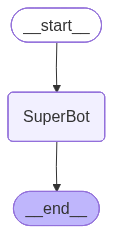

In [15]:
# Creamos el grafo de estado con la clase State definida anteriormente
graph=StateGraph(State)

# Nodos - Agregamos el nodo "SuperBot" que ejecuta la función superbot
graph.add_node("SuperBot",superbot)

# Aristas - Definimos las conexiones entre nodos
# Conectamos el nodo START al nodo SuperBot
graph.add_edge(START,"SuperBot")
# Conectamos el nodo SuperBot al nodo END
graph.add_edge("SuperBot",END)

# Compilamos el grafo para poder ejecutarlo
graph_builder=graph.compile()


# Visualización - Mostramos el diagrama del grafo
# Importamos Image y display para mostrar imágenes en Jupyter
from IPython.display import Image, display
# Generamos y mostramos el diagrama del grafo en formato Mermaid PNG
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [16]:
# Invocación - Ejecutamos el grafo con un mensaje inicial

# Invocamos el grafo compilado con un mensaje en español
graph_builder.invoke({'messages':"Hola, me llamo Krish y me gusta el cricket"})

{'messages': [HumanMessage(content='Hola, me llamo Krish y me gusta el cricket', additional_kwargs={}, response_metadata={}, id='eff956e4-f857-4c9b-b0c8-14046f2ae21c'),
  AIMessage(content='Hola Krish. Me alegra saber que te gusta el cricket. ¿Cuál es tu equipo favorito o jugador favorito? El cricket es un deporte fascinante con una rica historia y una gran variedad de estilos de juego. ¿Te gusta seguir partidos internacionales, como la Copa del Mundo o la Liga de Naciones, o prefieres seguir a los equipos de tu país o región?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 87, 'prompt_tokens': 46, 'total_tokens': 133, 'completion_time': 0.18796716, 'prompt_time': 0.003019172, 'queue_time': 0.392140023, 'total_time': 0.190986332}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_33e8adf159', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--9687d3f1-af1b-4e4a-b918-6d4272bcca33-0', usage_metadata={'input_toke

#### Transmitiendo las Respuestas (Streaming)

In [17]:
# Iteramos sobre los eventos generados por el streaming del grafo
# stream() permite recibir las respuestas de manera incremental
for event in graph_builder.stream({"messages":"Hola, me llamo Raul"}):
    # Imprimimos cada evento generado durante la ejecución
    print(event)

{'SuperBot': {'messages': [AIMessage(content='Hola Raul, ¿cómo estás? ¿En qué puedo ayudarte hoy?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 42, 'total_tokens': 61, 'completion_time': 0.025405495, 'prompt_time': 0.005943937, 'queue_time': 0.203234645, 'total_time': 0.031349432}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ab04adca7d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--57e819e6-f8d5-4e71-86bc-be2c965066bf-0', usage_metadata={'input_tokens': 42, 'output_tokens': 19, 'total_tokens': 61})]}}
